<h1>CO2 Emissions From Agriculture

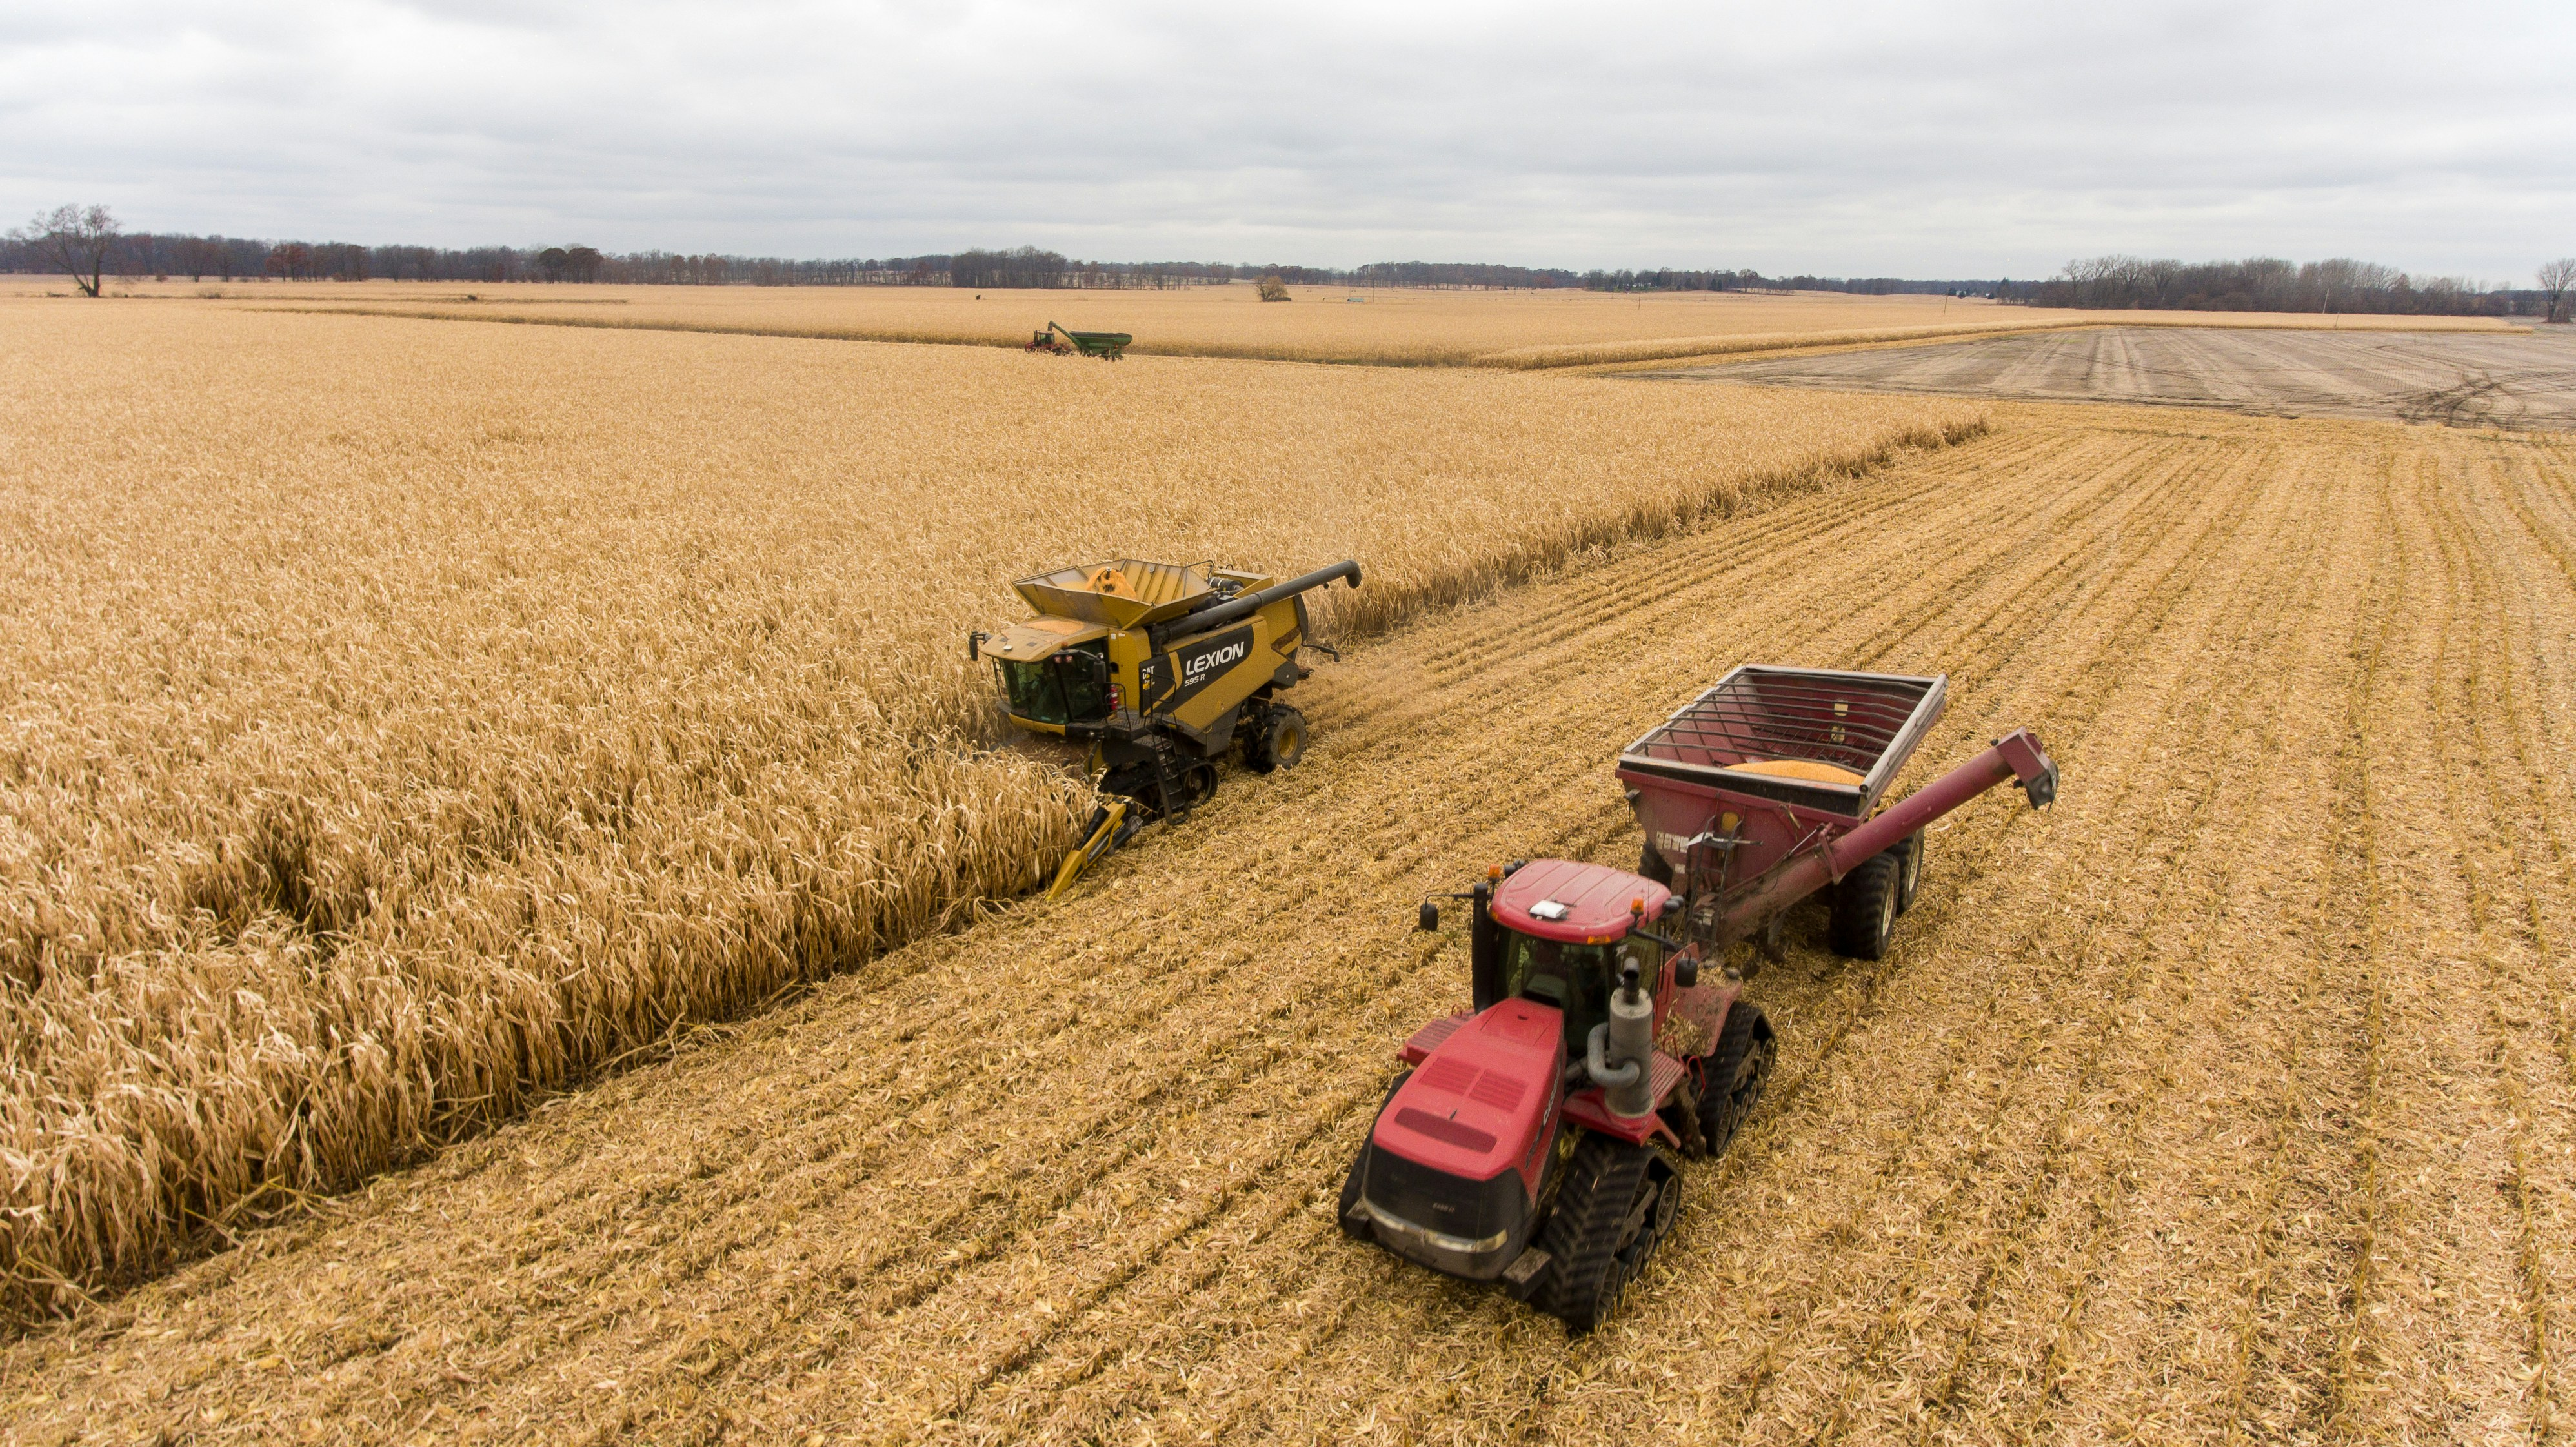

In [4]:
from IPython.display import Image, display
import os

notebook_dir = os.getcwd()

image_filename = "Agri_img.jpg"
image_path = os.path.join(notebook_dir, image_filename)

display(Image(filename=image_path, width=800, height=600))

<h3>Table of Contents</h3>

<ol>
    <li><a href="#section1">Project Overview</a>
        <ol>
            <li><a href="#section1-1">Introduction</a></li>
            <li><a href="#section1-2">Problem Statement</a></li>
            <li><a href="#section1-3">Objectives</a></li>
        </ol>
    </li>
    <li><a href="#section2">Importing Packages</a></li>
    <li><a href="#section3">Loading Data</a></li>
    <li><a href="#section4">Data Cleaning / EDA</a></li>
    <li><a href="#section5">Linear Regression Analysis</a>
        <ol>
            <li><a href="#section5-1">Simple Linear Regression</a></li>
            <li><a href="#section5-2">Multiple Linear Regression</a></li>
        </ol>
    </li>
    <li><a href= "section6">Non-Linear Regression</a></li>
        <ol>
            <li><a href= "section6-1">Decision Tree</a></li>
        </ol>
    <li><a href="#section7">Ensembling Methods</a>
        <ol>
            <li><a href="#section7-1">Heterogeneous</a></li>
            <li><a href="#section7-2">Homogeneous</a></li>
        </ol>
    </li>
    <li><a href="#section8">Conclusion</a></li>
</ol>

<h3 id="section1">1. Project Overview</h3>

<h4 id = "section1-1">A. Introduction</h4>

<h4 id = "section1-2">B. Problem Statement</h4>

<h4 id = "section1-3">C. Objectives</h4>

<h3 id = "section2">2. Package imports</h3>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols

import math

<h3 id = "section3">3. Loading Data</h3>

In [8]:
df = pd.read_csv("co2_emissions_from_agri.csv", index_col = False)
df.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

<h3 id = "section4">4. Data Cleaning / EDA</h3>

In [121]:
#Checking to see how many null values are present in the data
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [10]:
#Creating a copy of the data frame to avoid losing data or making mistakes on the main data frame

df_copy = df
df_copy.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 NaN         9655167.0   
1                              0.0                 NaN        10230490.0   
2                              0.0                 NaN        10995568.0   
3                              0.0                 NaN        11858090.0   
4                              0.0                 NaN        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

In [12]:
#Iteratively replacing null values with either the mean for that particular area or 0 

df_copy = df_copy.replace('', np.nan)

# Iterating through the columns of the data frame
for column in df_copy.columns:
    if column == 'your_column':  # Replace NaN with mean for specific column
        df_copy[column] = df_copy[column].fillna(df_copy.groupby('Area')[column].transform('mean'))
    else:  # Replace NaN with 0 for other columns
        df_copy[column] = df_copy[column].fillna(0)

df_copy.head()

Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...           319.1763                     0.0   
1         61.2125   -2388.803  ...           342.3079                     0.0   
2         53.3170   -2388.803  ...           349.1224                     0.0   
3         54.3617   -2388.803  ...           352.2947                     0.0   
4         53.9874   -2388.803  ...           367.6784                     0.0   

   Fires in humid tropical forests  On-farm energy use  Rural population  \
0                              0.0                 0.0         9655167.0   
1                              0.0                 0.0        10230490.0   
2                              0.0                 0.0        10995568.0   
3                              0.0                 0.0        11858090.0   
4                              0.0                 0.0        12690115.0   

   Urban population  Total Population - Male  Total Population - Female  \
0         2593947.0                5348387.0                  5346409.0   
1         2763167.0                5372959.0                  5372208.0   
2         2985663.0                6028494.0                  6028939.0   
3         3237009.0                7003641.0                  7000119.0   
4         3482604.0                7733458.0                  7722096.0   

   total_emission  Average Temperature °C  
0     2198.963539                0.536167  
1     2323.876629                0.020667  
2     2356.304229               -0.259583  
3     2368.470529                0.101917  
4     2500.768729                0.372250  

[5 rows x 31 columns]

In [14]:
#Re-arranging columns such that the CO2 emission column is first

cols = df_copy.columns.tolist()
cols = [cols[-1]] + cols[:-1]
df_copy = df_copy[cols]

df_copy.head()

Average Temperature °C         Area  Year  Savanna fires  Forest fires  \
0                0.536167  Afghanistan  1990        14.7237        0.0557   
1                0.020667  Afghanistan  1991        14.7237        0.0557   
2               -0.259583  Afghanistan  1992        14.7237        0.0557   
3                0.101917  Afghanistan  1993        14.7237        0.0557   
4                0.372250  Afghanistan  1994        14.7237        0.0557   

   Crop Residues  Rice Cultivation  Drained organic soils (CO2)  \
0       205.6077            686.00                          0.0   
1       209.4971            678.16                          0.0   
2       196.5341            686.00                          0.0   
3       230.8175            686.00                          0.0   
4       242.0494            705.60                          0.0   

   Pesticides Manufacturing  Food Transport  ...  Manure left on Pasture  \
0                 11.807483         63.1152  ...               1590.5319   
1                 11.712073         61.2125  ...               1657.2364   
2                 11.712073         53.3170  ...               1653.5068   
3                 11.712073         54.3617  ...               1642.9623   
4                 11.712073         53.9874  ...               1689.3593   

   Manure Management  Fires in organic soils  Fires in humid tropical forests  \
0           319.1763                     0.0                              0.0   
1           342.3079                     0.0                              0.0   
2           349.1224                     0.0                              0.0   
3           352.2947                     0.0                              0.0   
4           367.6784                     0.0                              0.0   

   On-farm energy use  Rural population  Urban population  \
0                 0.0         9655167.0         2593947.0   
1                 0.0        10230490.0         2763167.0   
2                 0.0        10995568.0         2985663.0   
3                 0.0        11858090.0         3237009.0   
4                 0.0        12690115.0         3482604.0   

   Total Population - Male  Total Population - Female  total_emission  
0                5348387.0                  5346409.0     2198.963539  
1                5372959.0                  5372208.0     2323.876629  
2                6028494.0                  6028939.0     2356.304229  
3                7003641.0                  7000119.0     2368.470529  
4                7733458.0                  7722096.0     2500.768729  

[5 rows x 31 columns]

<h3 id = "section5">5. Feature Selection</h3>

In [16]:
# We can drop Area since we won't be working with individual countries
df_copy = df_copy.drop(['Area'], axis=1)

In [28]:
# We get the correlations with respect to our target variable total emissions
df_copy.columns = df_copy.columns.str.replace(' ', '_')
df_copy.columns = df_copy.columns.str.replace('°', '')
df_copy.columns = df_copy.columns.str.replace('-', '_')
df_copy.columns = df_copy.columns.str.replace('(', '')
df_copy.columns = df_copy.columns.str.replace(')', '')
original_df = df_copy
corrs = df_copy.corr()['Average_Temperature_C'].sort_values(ascending=False)
corrs

Average_Temperature_C              1.000000
Year                               0.545932
Food_Transport                     0.075724
Food_Retail                        0.073404
IPPU                               0.062396
Food_Household_Consumption         0.055602
Food_Processing                    0.053083
Manure_applied_to_Soils            0.042353
Fertilizers_Manufacturing          0.041462
Food_Packaging                     0.040767
On_farm_energy_use                 0.039012
Urban_population                   0.036263
Manure_Management                  0.032787
Drained_organic_soils_CO2          0.029030
Pesticides_Manufacturing           0.027960
Crop_Residues                      0.026126
total_emission                     0.019043
On_farm_Electricity_Use            0.009081
Agrifood_Systems_Waste_Disposal    0.008995
Total_Population___Female          0.005456
Total_Population___Male            0.003623
Manure_left_on_Pasture            -0.015928
Rural_population                

In [30]:
# Getting OLS summary with all features
y_name = 'Average_Temperature_C'
X_names = [col for col in df_copy.columns if col not in y_name]
    
first_formula = y_name+" ~ "+" + ".join(X_names);

model=ols(formula=first_formula, data=df_copy)
first_fit = model.fit()
print(first_fit.summary())

                              OLS Regression Results                             
Dep. Variable:     Average_Temperature_C   R-squared:                       0.326
Model:                               OLS   Adj. R-squared:                  0.323
Method:                    Least Squares   F-statistic:                     119.8
Date:                   Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                           22:04:41   Log-Likelihood:                -4419.8
No. Observations:                   6965   AIC:                             8898.
Df Residuals:                       6936   BIC:                             9096.
Df Model:                             28                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [32]:
# We use variable selection by correlation and significance
# We use Pearson regression to get the p-values to select features
from scipy.stats import pearsonr

pv_corr = {}

column_names = [col for col in corrs.index if col!= 'Average_Temperature_C']

for col in column_names:
    p_value = round(pearsonr(df_copy[col], df_copy['Average_Temperature_C'])[1],6)
    pv_corr[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_value}
    
df_pv_corr = pd.DataFrame(pv_corr).T.sort_values('P_Value')

#Keep statistically significant features using a significance value of 0.05
df_pv_corr = df_pv_corr[df_pv_corr['P_Value'] < 0.05]

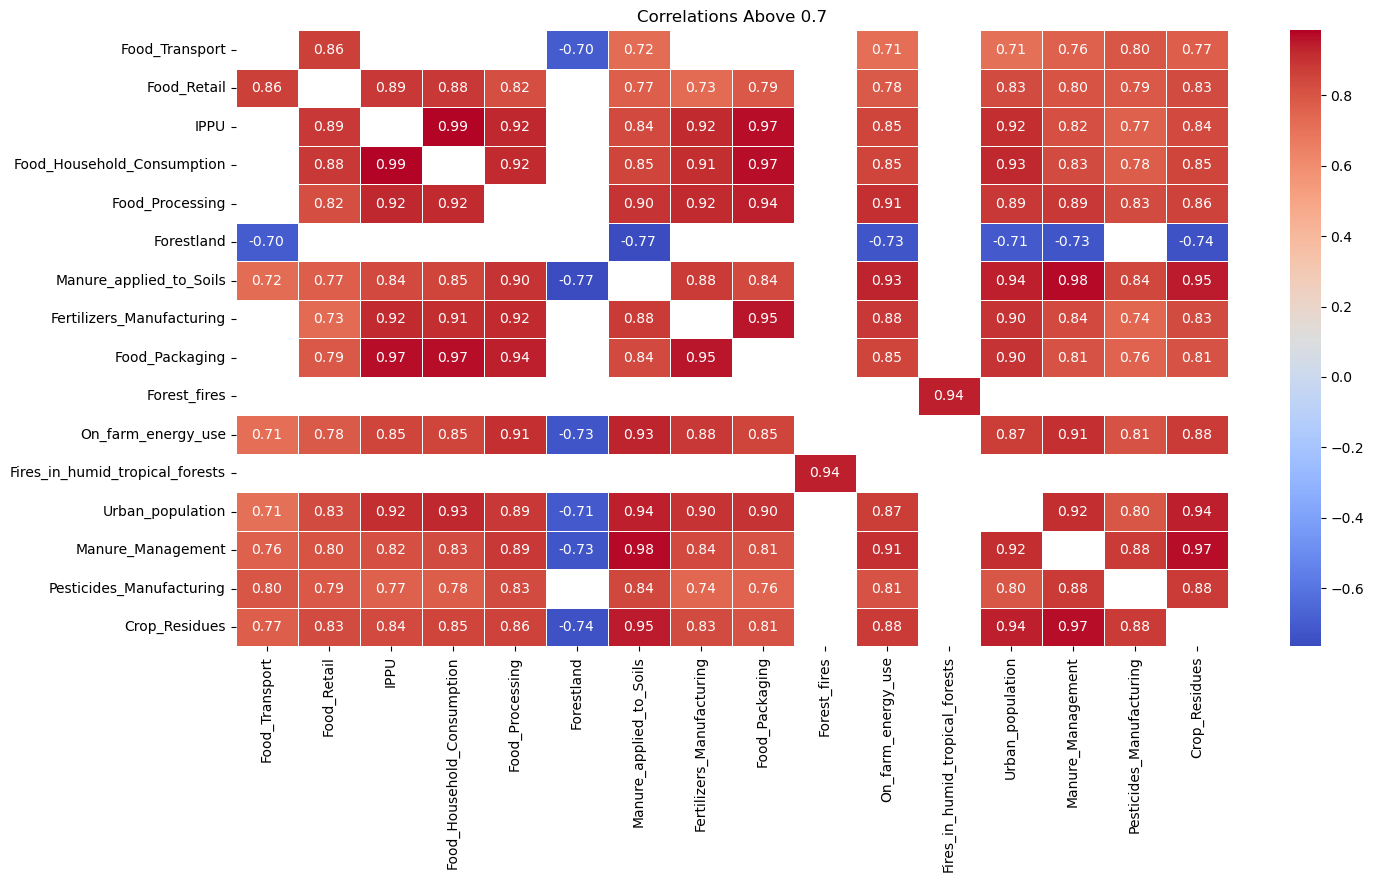

In [36]:
# Isolating highly correlated features
y_data = df_copy['Average_Temperature_C']
X_columns = list(df_pv_corr.index)
X_data = df_copy[X_columns]
multi_corr = X_data.corr()

filtered_m_corr = multi_corr[abs(multi_corr) > 0.7]
np.fill_diagonal(filtered_m_corr.values, np.nan)
filtered_m_corr = filtered_m_corr.dropna(how='all').dropna(axis=1, how='all')

plt.figure(figsize=(16, 8))
sns.heatmap(filtered_m_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlations Above {0.7}')
plt.show()

In [40]:
# Getting correlation between the isolated features with high collinearity and the target variable
m_corr_list = list(filtered_m_corr.index) + ['Average_Temperature_C']
target_var_corr = df_copy[m_corr_list].corr()['Average_Temperature_C']
target_var_corr


Food_Transport                     0.075724
Food_Retail                        0.073404
IPPU                               0.062396
Food_Household_Consumption         0.055602
Food_Processing                    0.053083
Forestland                        -0.052133
Manure_applied_to_Soils            0.042353
Fertilizers_Manufacturing          0.041462
Food_Packaging                     0.040767
Forest_fires                      -0.039374
On_farm_energy_use                 0.039012
Fires_in_humid_tropical_forests   -0.036910
Urban_population                   0.036263
Manure_Management                  0.032787
Pesticides_Manufacturing           0.027960
Crop_Residues                      0.026126
Average_Temperature_C              1.000000
Name: Average_Temperature_C, dtype: float64

In [42]:
# Removing features with high collinearity
feat_exclude = ['Food_Household_Consumption', 'Fires_in_humid_tropical_forests', 'Manure_Management',
                'Food_Packaging', 'On_farm_energy_use', 'Urban_population', 'Food_Processing',
                'Fertilizers_Manufacturing', 'Crop_Residues', 'Food_Retail', 'Forestland', 'Manure_applied_to_Soils',
                'Pesticides_Manufacturing']

df_copy = df_copy[[feat for feat in df_copy.columns if feat not in feat_exclude]]


In [44]:
# Getting the OLS summary with the remaining features

model_df = df_copy.copy()

def getFormulaString(model_df, col_names):
    
    y_name = 'Average_Temperature_C'
    X_names = [col for col in model_df.columns if col in col_names]
    
    formula_str = y_name+" ~ "+" + ".join(X_names);

    return formula_str, X_names

col_names = list(model_df.columns)
col_names.remove('Average_Temperature_C')
formula_str, X_names = getFormulaString(model_df, col_names)
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 Average_Temperature_C ~ Year + Savanna_fires + Forest_fires + Rice_Cultivation + Drained_organic_soils_CO2 + Food_Transport + Net_Forest_conversion + On_farm_Electricity_Use + Agrifood_Systems_Waste_Disposal + IPPU + Manure_left_on_Pasture + Fires_in_organic_soils + Rural_population + Total_Population___Male + Total_Population___Female + total_emission


In [63]:
model=ols(formula=formula_str, data=model_df)
fitted = model.fit()

print(fitted.summary())

                              OLS Regression Results                             
Dep. Variable:     Average_Temperature_C   R-squared:                       0.314
Model:                               OLS   Adj. R-squared:                  0.312
Method:                    Least Squares   F-statistic:                     198.7
Date:                   Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                           20:08:42   Log-Likelihood:                -4481.1
No. Observations:                   6965   AIC:                             8996.
Df Residuals:                       6948   BIC:                             9113.
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

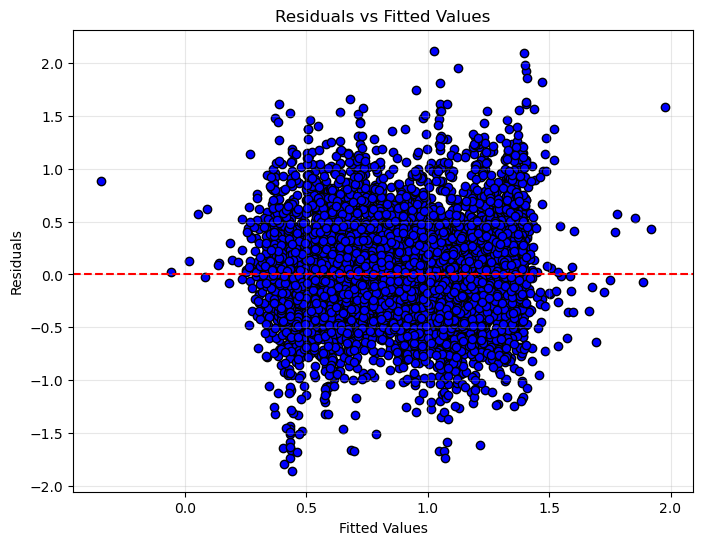

In [135]:
residuals = fitted.resid
fitted_values = fitted.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values,residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()

In [67]:
signif_pvalues = fitted.pvalues[fitted.pvalues < 0.05]
signif_features = list(signif_pvalues.index)
signif_features.remove('Intercept')
signif_features

['Year',
 'Forest_fires',
 'Rice_Cultivation',
 'Drained_organic_soils_CO2',
 'Net_Forest_conversion',
 'On_farm_Electricity_Use',
 'Agrifood_Systems_Waste_Disposal',
 'IPPU',
 'Manure_left_on_Pasture',
 'Fires_in_organic_soils',
 'Rural_population',
 'Total_Population___Male',
 'Total_Population___Female']

In [69]:
formula_str2, X_names = getFormulaString(model_df, signif_features)
print(formula_str2)
model=ols(formula=formula_str2, data=model_df)
fitted2 = model.fit()

print(fitted2.summary())

Average_Temperature_C ~ Year + Forest_fires + Rice_Cultivation + Drained_organic_soils_CO2 + Net_Forest_conversion + On_farm_Electricity_Use + Agrifood_Systems_Waste_Disposal + IPPU + Manure_left_on_Pasture + Fires_in_organic_soils + Rural_population + Total_Population___Male + Total_Population___Female
                              OLS Regression Results                             
Dep. Variable:     Average_Temperature_C   R-squared:                       0.314
Model:                               OLS   Adj. R-squared:                  0.312
Method:                    Least Squares   F-statistic:                     244.2
Date:                   Sun, 08 Dec 2024   Prob (F-statistic):               0.00
Time:                           20:09:10   Log-Likelihood:                -4483.1
No. Observations:                   6965   AIC:                             8994.
Df Residuals:                       6951   BIC:                             9090.
Df Model:                             1

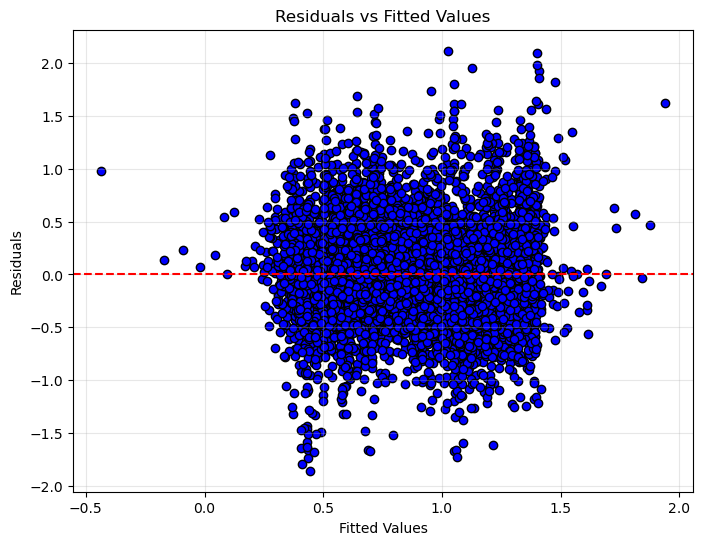

In [71]:
residuals2 = fitted2.resid
fitted_values2 = fitted2.fittedvalues
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values2,residuals2, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1.5)
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.grid(alpha=0.3)
plt.show()

In [139]:
X_names = ['Average_Temperature_C'] + X_names
model_df = model_df[X_names]
df_copy = model_df
print(df_copy.shape)
df_copy.head()

(6965, 14)


Average_Temperature_C  Year  Forest_fires  Rice_Cultivation  \
0               0.536167  1990        0.0557            686.00   
1               0.020667  1991        0.0557            678.16   
2              -0.259583  1992        0.0557            686.00   
3               0.101917  1993        0.0557            686.00   
4               0.372250  1994        0.0557            705.60   

   Drained_organic_soils_CO2  Net_Forest_conversion  On_farm_Electricity_Use  \
0                        0.0                    0.0                  14.2666   
1                        0.0                    0.0                  11.4182   
2                        0.0                    0.0                   9.2752   
3                        0.0                    0.0                   9.0635   
4                        0.0                    0.0                   8.3962   

   Agrifood_Systems_Waste_Disposal      IPPU  Manure_left_on_Pasture  \
0                         691.7888  209.9778               1590.5319   
1                         710.8212  217.0388               1657.2364   
2                         743.6751  222.1156               1653.5068   
3                         791.9246  201.2057               1642.9623   
4                         831.9181  182.2905               1689.3593   

   Fires_in_organic_soils  Rural_population  Total_Population___Male  \
0                     0.0         9655167.0                5348387.0   
1                     0.0        10230490.0                5372959.0   
2                     0.0        10995568.0                6028494.0   
3                     0.0        11858090.0                7003641.0   
4                     0.0        12690115.0                7733458.0   

   Total_Population___Female  
0                  5346409.0  
1                  5372208.0  
2                  6028939.0  
3                  7000119.0  
4                  7722096.0

In [50]:
#Updating the main data frame with the cleaned data

df = df_copy

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Average_Temperature_C            6965 non-null   float64
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6965 non-null   float64
 3   Forest_fires                     6965 non-null   float64
 4   Rice_Cultivation                 6965 non-null   float64
 5   Drained_organic_soils_CO2        6965 non-null   float64
 6   Food_Transport                   6965 non-null   float64
 7   Net_Forest_conversion            6965 non-null   float64
 8   On_farm_Electricity_Use          6965 non-null   float64
 9   Agrifood_Systems_Waste_Disposal  6965 non-null   float64
 10  IPPU                             6965 non-null   float64
 11  Manure_left_on_Pasture           6965 non-null   float64
 12  Fires_in_organic_soi

<h3 id = "section5">6. Linear Regression Analysis</h3>

<h4 id = "section5-1">A. Simple Linear Regression</h4>

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5634
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.453
Time:                        22:07:51   Log-Likelihood:                -5792.9
No. Observations:                6965   AIC:                         1.159e+04
Df Residuals:                    6963   BIC:                         1.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8716      0.007    126.270      0.000       0.858       0.885
x1          2.257e-07   3.01e-07      0.751      0.453   -3.64e-07    8.15e-07
==============================================================================
Omnibus:                      262.750   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.253
Skew:                           0.330   Prob(JB):                     3.06e-95
Kurtosis:                       4.031   Cond. No.                     2.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

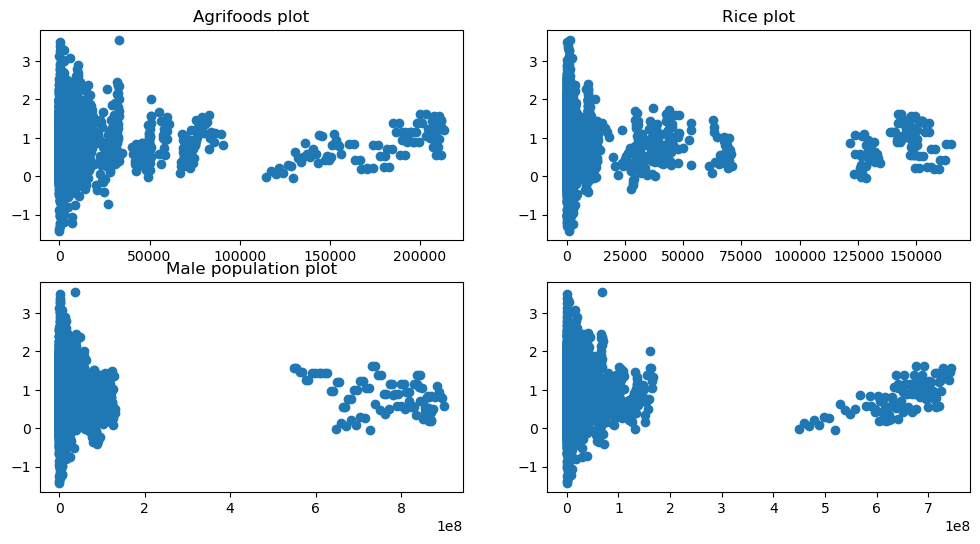

In [52]:
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sms
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import OLSInfluence
#Reshape dataset
temperature=df['Average_Temperature_C'].values.reshape(-1,1)
agrifoods=df['Agrifood_Systems_Waste_Disposal'].values.reshape(-1,1)
rice=df['Rice_Cultivation'].values.reshape(-1,1)
rural=df['Rural_population'].values.reshape(-1,1)
malepop=df['Total_Population___Male'].values.reshape(-1,1)

#Agrifoods Prediction Model
model1=LinearRegression()
model1.fit(agrifoods,temperature)
prediction1=model1.predict(agrifoods)


#Rice Preditcion Model
model2=LinearRegression()
model2.fit(rice,temperature)
prediction2=model2.predict(rice)


#Male Population Prediction model
model3=LinearRegression()
model3.fit(malepop,temperature)
prediction3=model3.predict(malepop)
prediction3

#Emissions Prediction model
model4=LinearRegression()
model4.fit(rural,temperature)
prediction4=model4.predict(rural)


fig, axs = plt.subplots(2, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot the first scatter plot on the first subplot (left side)
axs[0,0].scatter(agrifoods, temperature)  # Red points
axs[0,0].set_title('Agrifoods plot')

axs[0,1].scatter(rice,temperature)
axs[0,1].set_title('Rice plot')

axs[1,0].scatter(rural,temperature)
axs[1,0].set_title('Rural population plot')

axs[1,1].scatter(malepop,temperature)
axs[1,0].set_title('Male population plot')

model1s = sms.OLS(temperature, sms.add_constant(agrifoods)).fit()
model1s.summary()

<h5>Insights</h5>

<h4 id = "section5-2">B. Multiple Linear Regression</h4>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Average_Temperature_C            6965 non-null   float64
 1   Year                             6965 non-null   int64  
 2   Savanna_fires                    6965 non-null   float64
 3   Forest_fires                     6965 non-null   float64
 4   Rice_Cultivation                 6965 non-null   float64
 5   Drained_organic_soils_CO2        6965 non-null   float64
 6   Food_Transport                   6965 non-null   float64
 7   Net_Forest_conversion            6965 non-null   float64
 8   On_farm_Electricity_Use          6965 non-null   float64
 9   Agrifood_Systems_Waste_Disposal  6965 non-null   float64
 10  IPPU                             6965 non-null   float64
 11  Manure_left_on_Pasture           6965 non-null   float64
 12  Fires_in_organic_soi

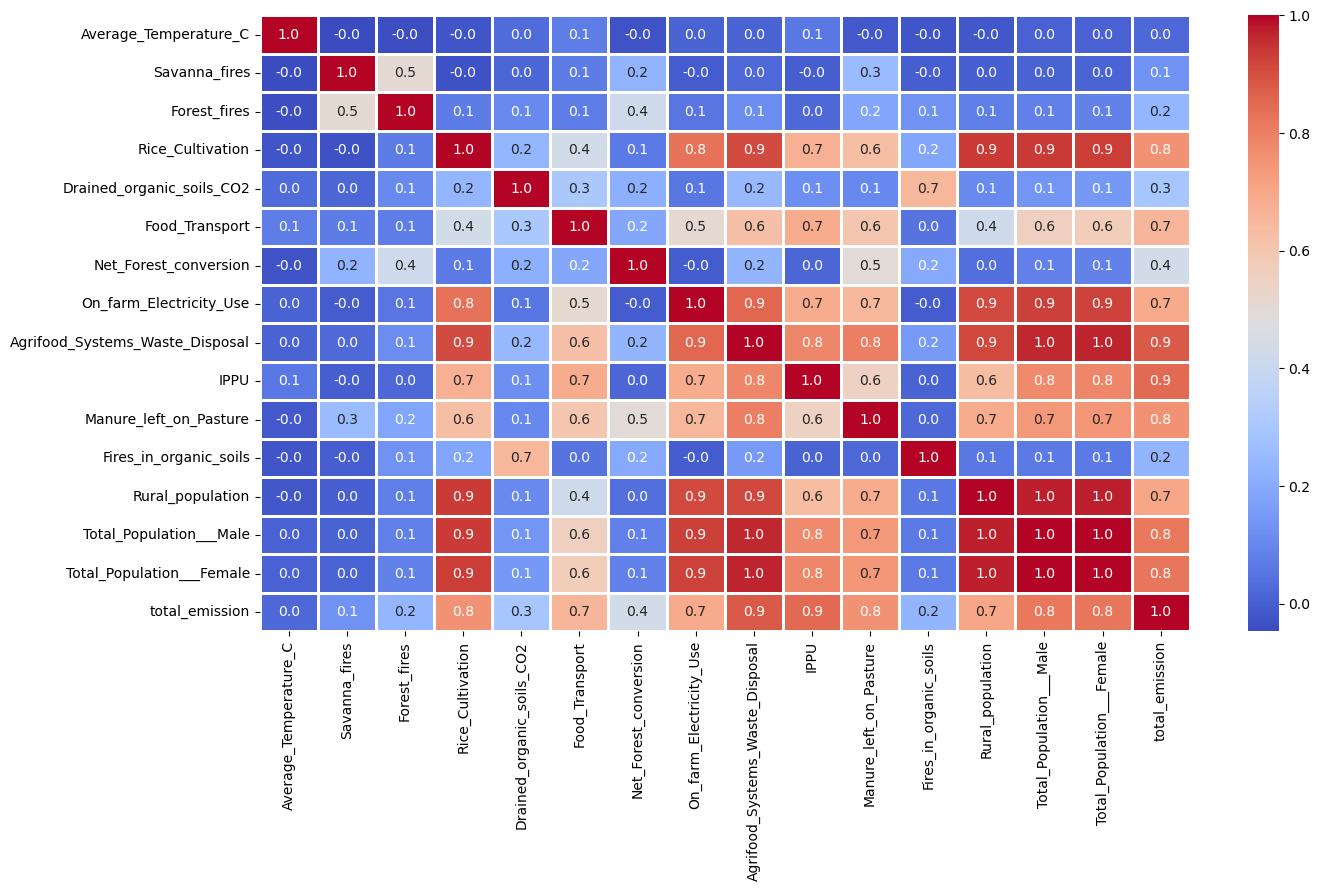

 R-squared:0.02006276442750543
 Mean Squared Error:0.30041978730598956
 Mean Absolute Error:0.42486980512918976


In [53]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df.info()
#We sepearte the table  in following ways. The 1st table contains the y variable only which is the total emission, then the next table contains the continous variables.
y = df['Average_Temperature_C']
X = df.drop(columns=['Average_Temperature_C','Year'])



contvar=df.select_dtypes(include=['float64'])
contvar

#Correlation
corrmatrix=contvar.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.8)
plt.show()

#Test splitting
multimodel = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multimodel.fit(X_train, y_train)
predictY = multimodel.predict(X_test)
predictY

r2 = r2_score(y_test, predictY)
mse = mean_squared_error(y_test, predictY)
mae = mean_absolute_error(y_test, predictY)

print(f' R-squared:{r2}')
print(f' Mean Squared Error:{mse}')
print(f' Mean Absolute Error:{mae}')

<h5>Insights</h5>

<h3 id = "section6">7. Non-Linear Regression</h3>

<h4 id = "section6-1">A. Decision Tree</h4>

Mean Squared Error: 0.17210903294021906


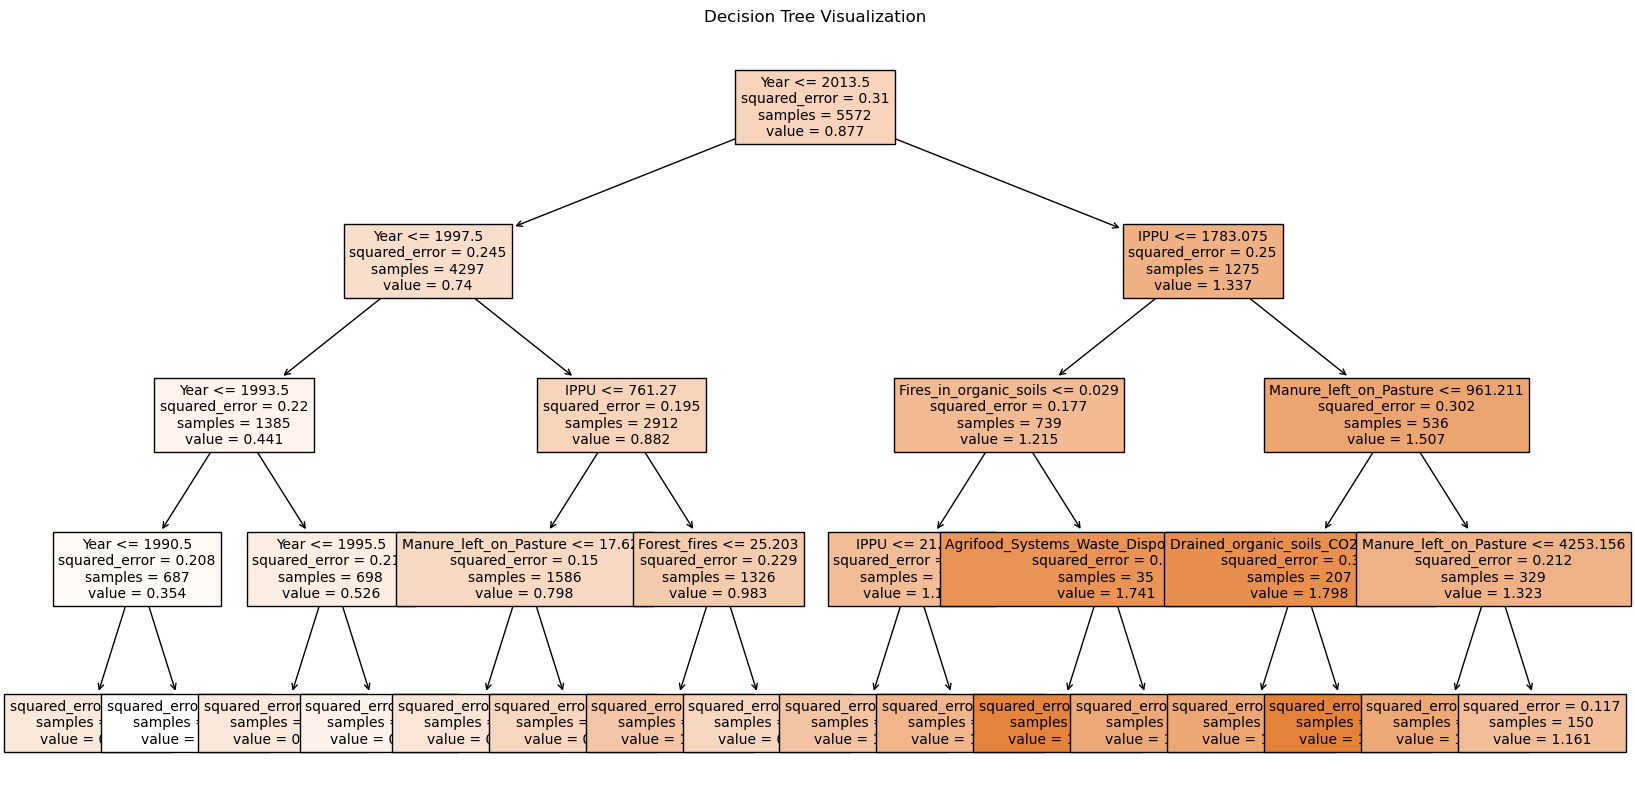

Best Hyperparameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Model MSE: 0.398


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


# Step 2: Split the dataset into training and testing sets
X = df.drop(columns=['Average_Temperature_C'])  # Features
y = df['Average_Temperature_C']  # Target variable

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=4)
tree_model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Step 5: Evaluate the model performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 6: Visualize the Decision Tree (optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Step 7: (Optional) Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Try different tree depths
    'min_samples_split': [2, 5, 10],  # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples needed at each leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Maximum features to consider when splitting
}

# Create a Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_tree_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_tree_model.predict(X_test)

# Evaluate the performance of the best model
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Best Model MSE: {np.sqrt(mse_best):.3f}")


<h3 id = "section7">8. Ensembling Methods</h3>

<h4 id = "section7-1">A. Heterogeneous</h4>

<h5>Voting</h5>

Combined Model - Mean Squared Error: 0.16851481277899794
Combined Model - R² Score: 0.4503226925612853
Random Forest - MSE: 0.15023753316667288 , R²: 0.5099412250744073
Linear Regression - MSE: 0.30041978730598956 , R²: 0.02006276442750543
XGBoost - MSE: 0.16880136141800856 , R²: 0.44938800152882297


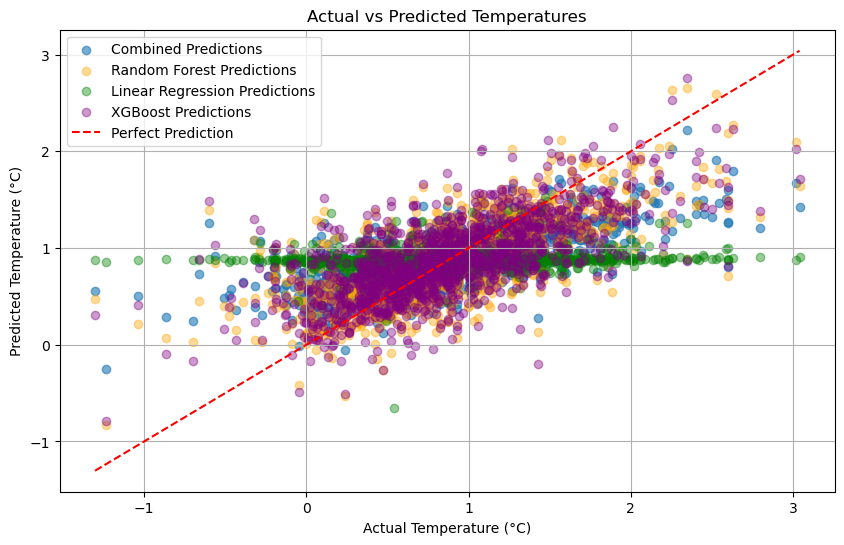

In [86]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
# Replace this with the actual loading of your dataset


# Features and Target
features = [
    'Savanna_fires', 'Forest_fires', 'Rice_Cultivation', 'Drained_organic_soils_CO2',
    'Food_Transport', 'Net_Forest_conversion', 'On_farm_Electricity_Use',
    'Agrifood_Systems_Waste_Disposal', 'IPPU', 'Manure_left_on_Pasture',
    'Fires_in_organic_soils', 'Rural_population', 
    'Total_Population___Male', 'Total_Population___Female', 'total_emission'
]
target = 'Average_Temperature_C'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()
xgb_model = XGBRegressor(random_state=42)

# Fit the models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Generate predictions
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Combine predictions using soft voting (average)
final_preds = np.mean([rf_preds, lr_preds, xgb_preds], axis=0)

# Evaluate the models
mse_combined = mean_squared_error(y_test, final_preds)
r2_combined = r2_score(y_test, final_preds)

print("Combined Model - Mean Squared Error:", mse_combined)
print("Combined Model - R² Score:", r2_combined)

# Evaluate individual models
mse_rf = mean_squared_error(y_test, rf_preds)
r2_rf = r2_score(y_test, rf_preds)

mse_lr = mean_squared_error(y_test, lr_preds)
r2_lr = r2_score(y_test, lr_preds)

mse_xgb = mean_squared_error(y_test, xgb_preds)
r2_xgb = r2_score(y_test, xgb_preds)

print("Random Forest - MSE:", mse_rf, ", R²:", r2_rf)
print("Linear Regression - MSE:", mse_lr, ", R²:", r2_lr)
print("XGBoost - MSE:", mse_xgb, ", R²:", r2_xgb)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_preds, alpha=0.6, label="Combined Predictions")
plt.scatter(y_test, rf_preds, alpha=0.4, label="Random Forest Predictions", color="orange")
plt.scatter(y_test, lr_preds, alpha=0.4, label="Linear Regression Predictions", color="green")
plt.scatter(y_test, xgb_preds, alpha=0.4, label="XGBoost Predictions", color="purple")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperatures")
plt.legend()
plt.grid()
plt.show()


In [47]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 3.3 MB/s eta 0:00:39
   ---------------------------------------- 0.5/124.9 MB 3.0 MB/s eta 0:00:41
   ---------------------------------------- 0.7/124.9 MB 2.7 MB/s eta 0:00:47
   ---------------------------------------- 0.9/124.9 MB 2.6 MB/s eta 0:00:48
   ---------------------------------------- 1.1/124.9 MB 2.4 MB/s eta 0:00:52
   ---------------------------------------- 1.2/124.9 MB 2.3 MB/s eta 0:00:53
   ---------------------------------------- 1.4/124.9 MB 2.3 MB/s eta 0:00:55
    --------------------------------------- 1.6/124.9 MB 2.2 MB/s eta 0:00:58
    --------------------------------------- 1.8/124.9 MB 2.2 MB/s eta 0:00:56
    --------------------------------------- 1.9/124.9 MB 2.2 MB/s eta 0:00:56
    --------------------------------------- 2.1/124.9 MB 2.2 MB/s eta 0:00:57
    --------------------------------------- 2.3/124.9 MB 2.2 MB/s eta 0

fixing column names for consistency 

In [42]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('___', '_').str.lower()


<h5>Insights</h5>

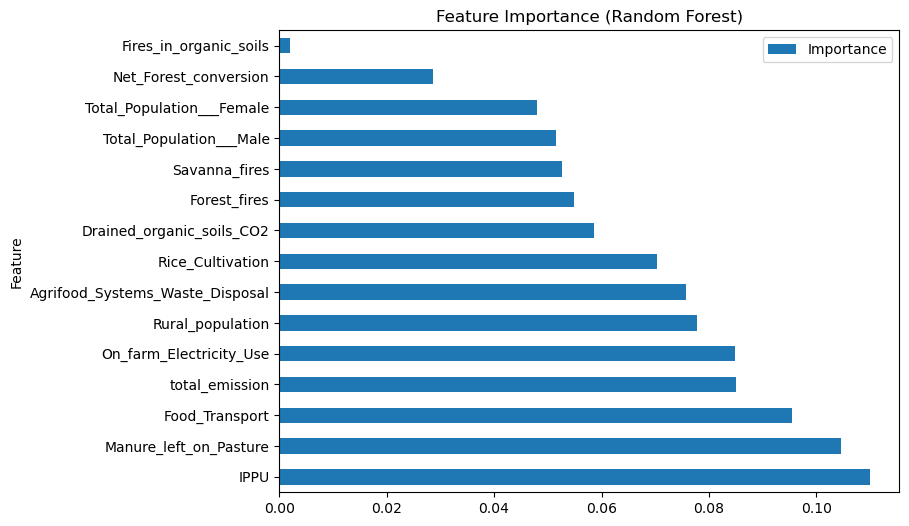

100%|===================| 1391/1393 [08:47<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.943264, while the model output was 0.958704. If this difference is acceptable you can set check_additivity=False to disable this check.

In [95]:
#This stage focuses on understanding key drivers of the target variable and exploring the relationships between features and predictions

feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
importance_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), title="Feature Importance (Random Forest)")
plt.show()

import shap
explainer = shap.Explainer(rf_model, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [93]:
pip install shap


   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ----------------- ---------------------- 194.6/456.2 kB ? eta -:--:--
   ------------------------- -------------- 286.7/456.2 kB 5.9 MB/s eta 0:00:01
   ------------------------------- -------- 358.4/456.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 389.1/456.2 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------  450.6/456.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


 A summary plot showing the impact of each feature on the model’s predictions is displayed above. The importance of each feature is displayed, and we visualize how changes in feature values impact the model's output.

In [99]:
# Ensure the shape of X_test matches the input used for training
print(X_test.shape)


(1393, 15)


In [103]:
shap_values = explainer(X_test, check_additivity=False)


100%|===================| 1392/1393 [09:22<00:00]        

<h5>Stacking</h5>

<h5>Insights</h5>

In [157]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R² for the stacked model
mse_stacking = mean_squared_error(y_test, stacking_preds)
r2_stacking = r2_score(y_test, stacking_preds)

# Calculate MSE and R² for individual models
mse_rf = mean_squared_error(y_test, rf_preds)
r2_rf = r2_score(y_test, rf_preds)

mse_lr = mean_squared_error(y_test, lr_preds)
r2_lr = r2_score(y_test, lr_preds)

mse_xgb = mean_squared_error(y_test, xgb_preds)
r2_xgb = r2_score(y_test, xgb_preds)

# Print model comparison
print(f"Stacked Model - MSE: {mse_stacking:.4f}, R²: {r2_stacking:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")
print(f"Linear Regression - MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"XGBoost - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


Stacked Model - MSE: 0.1508, R²: 0.5081
Random Forest - MSE: 0.1502, R²: 0.5099
Linear Regression - MSE: 0.3004, R²: 0.0201
XGBoost - MSE: 0.1688, R²: 0.4494


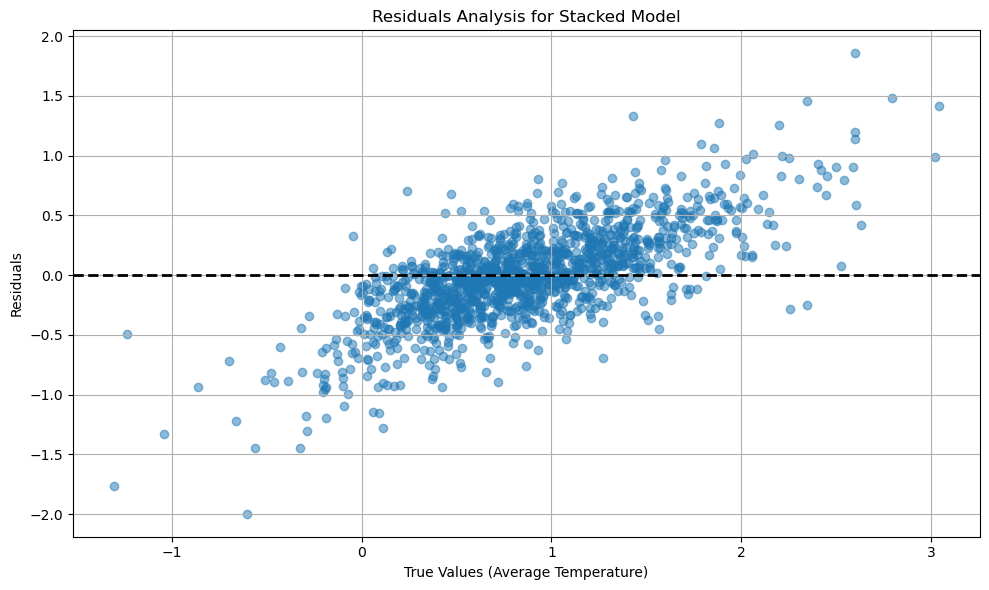

In [161]:
# Calculate residuals for the stacked model
stacking_residuals = y_test - stacking_preds

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, stacking_residuals, alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('True Values (Average Temperature)')
plt.ylabel('Residuals')
plt.title('Residuals Analysis for Stacked Model')
plt.grid(True)
plt.tight_layout()
plt.show()


<h4 id = "sectioon7-2">B. Homogeneous</h4>

<h5>Bootstrap Aggregating</h5>

In [163]:
# Applying bagging on the data
X = df.drop('Average_Temperature_C', axis=1)
y = df['Average_Temperature_C']

x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(X) 
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis]) 

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

d_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

bag_reg = BaggingRegressor(estimator = d_tree)
bag_reg.fit(x_train,y_train[:,0])

y_pred = bag_reg.predict(x_test)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}")

RMSE: 0.716


<h5>Insights</h5>

Using a `DecisionTreeRegressor` with bootstrap aggregating gives a relatively good RMSE value with the `max_depth` set to 5. The model requires the `max_depth` to be set at 5 because a higher `max_depth` makes the test RMSE to be higher than the train RMSE which is a sign that the model is overfitting the data (tested through iterations). A lower `max_depth` gives a higher RMSE than the current RMSE value, making the chosen model the best model for bootstrap aggregating.

<h5>Boosting</h5>

In [167]:
# Initialising base regressor
base_regressor = DecisionTreeRegressor(max_depth=4)

# Initialising AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(estimator=base_regressor, n_estimators=80, random_state=42)

# Fitting the model
adaboost_regressor.fit(x_train, y_train)

# Predictions using the test set
y_pred = adaboost_regressor.predict(x_test)

# Evaluating the model
boost_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {boost_rmse:.3f}")

C:\Users\bhemb\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 0.736


<h5>Insights</h5>

Using the `AdaBoostRegressor` with the `DecisionTreeRegressor` as the base estimator, we get a relatively good RMSE of 0.736. The `max_depth` was set to 4 as any higher would result in a lower RMSE, and could also risk introducing some overfitting. Considering that we are trying to predict temperature, this indicates that the model differences are less than 1 degree from the actual temperature values. 

<h5>Random Forest</h5>

In [171]:
# Applying random forest regressor
RF = RandomForestRegressor(n_estimators=80, max_depth=6)
RF.fit(x_train,y_train)

y_pred = RF.predict(x_test)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred)):.3f}")

C:\Users\bhemb\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE: 0.689


<h5>Insights</h5>

The random forest model gives the best RMSE at `n_estimators` set to 80. Other `n_estimators` values give a higher RMSE. This RMSE is lower than that achieved using bootstrap aggregating and boosting, making this model a better predictor of the target variable in the ensemble methods. The test RMSE of this model is slightly higher than the train RMSE which may be a sign of overfitting, but it's worth noting the margin is very small.

<h3 id = "section8">9. Conclusion</h3>